### Project Website: https://mohamedirfansh.github.io/Airbnb-Data-Science-Project/

# Problem Definition: What are the factors and features of a listing that make an AirBnb listing more expensive?

### Practical Motivation

AirBnb has provided many travellers a great, easy and convenient place to stay during their travels. Similarly, it has also However, with so many listings available with varying prices, how can an aspiring host know what type of property to invest in if his main aim is to list it in AirBnb and earn rental revenue? Additionally, if a traveller wants to find the cheapest listing available but with certain features he prefers like 'free parking' etc, how does he know what aspects to look into to find a suitable listing? There are many factors which influence the price of a listing. Which is why we aim to find the most important factors that affect the price and more importantly the features that is common among the most expensive listings. This will allow an aspiring AirBnb host to ensure that his listing is equipped with those important features such that he will be able to charge a higher price without losing customers. Moreover, a traveller will also know the factors to look into to get the lowest price possible while having certain features he prefers.

**The above problem definition can be broken down into 3 sub-problems each one targeting a different aspect of the dataset**. By analysing the dataset with respect to each sub-problem, we can gain useful statistical insights into the data. Afterwards, machine learning techniques and algorithmic optimisation will be performed on the dataset to determine the most important variables that influence the price of an AirBnb listing.

## Sub-Problem 1: What are the features/facilities/ammenities of a property that affects its price?

In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from collections import Counter

In [34]:
# Importing the listing dataset
listingsDF = pd.read_csv('datasets/listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20230621232643,2023-06-22,city scrape,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,...,5.00,4.56,4.67,NaN,f,1,0,1,0,0.07
1,23986,https://www.airbnb.com/rooms/23986,20230621232643,2023-06-22,city scrape,Rental unit in Milan · ★4.63 · 1 bedroom · 1 b...,I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,...,4.72,4.68,4.44,NaN,f,1,1,0,0,0.18
2,24107,https://www.airbnb.com/rooms/24107,20230621232643,2023-06-22,city scrape,Condo in Milan · ★4.50 · 1 bedroom · 6 beds · ...,Un grazioso bilocale completamente rinnovato i...,NaN,https://a0.muscache.com/pictures/cd4112f3-37c2...,46951,...,5.00,3.67,4.67,NaN,f,1,1,0,0,0.02
3,40470,https://www.airbnb.com/rooms/40470,20230621232643,2023-06-22,city scrape,Rental unit in Milan · ★4.66 · 2 bedrooms · 4 ...,<b>The space</b><br />If you want to visit Mil...,NaN,https://a0.muscache.com/pictures/891684/01c17b...,174203,...,4.87,4.39,4.50,NaN,f,2,2,0,0,0.27
4,46536,https://www.airbnb.com/rooms/46536,20230621232643,2023-06-22,city scrape,Rental unit in Milan · ★4.59 · 2 bedrooms · 3 ...,Over the international fair in April we rent f...,"Flat It's located in north side of milan, jus...",https://a0.muscache.com/pictures/4eb8e0f5-e17b...,138683,...,4.93,4.38,4.66,NaN,f,1,1,0,0,0.21


In [35]:
print("Data type : ", type(listingsDF))
print("Data dims : ", listingsDF.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (23142, 75)


### Data Cleaning

In [37]:
# After viewing the multiple columns in the listings.csv from the data_description.txt, 
# the following variables were picked for further analysis and dropped variables like date_scraped etc.
listingDF = listingsDF[['id','name','longitude','latitude','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time', 'review_scores_rating','property_type','room_type','accommodates','bedrooms','beds','reviews_per_month','amenities','number_of_reviews','price']]
listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,review_scores_rating,property_type,room_type,accommodates,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,6400,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,9.17813,45.44119,"Enjoy your stay at The Studio, a light-filled ...",f,The neighborhood is quiet and very well connec...,TIBALDI,13822,Francesca,...,4.89,Private room in rental unit,Private room,1,NaN,1.0,0.07,"[""Essentials"", ""Iron"", ""Hangers"", ""Host greets...",12,$100.00
1,23986,Rental unit in Milan · ★4.63 · 1 bedroom · 1 b...,9.17373,45.44806,I look forward to welcoming you in my flat; it...,f,NaN,NAVIGLI,95941,Jeremy,...,4.63,Entire rental unit,Entire home/apt,4,1.0,1.0,0.18,"[""Essentials"", ""Iron"", ""Hangers"", ""Dishes and ...",25,$150.00
2,24107,Condo in Milan · ★4.50 · 1 bedroom · 6 beds · ...,9.23669,45.47179,Un grazioso bilocale completamente rinnovato i...,f,NaN,CITTA' STUDI,46951,Valeria,...,4.50,Entire condo,Entire home/apt,4,1.0,6.0,0.02,"[""Heating"", ""TV"", ""Air conditioning"", ""Kitchen...",4,$100.00
3,40470,Rental unit in Milan · ★4.66 · 2 bedrooms · 4 ...,9.22747,45.52023,<b>The space</b><br />If you want to visit Mil...,f,NaN,VIALE MONZA,174203,Giacinto,...,4.66,Entire rental unit,Entire home/apt,4,2.0,4.0,0.27,"[""Essentials"", ""Iron"", ""Hangers"", ""TV with sta...",41,$80.00
4,46536,Rental unit in Milan · ★4.59 · 2 bedrooms · 3 ...,9.22478,45.52276,Over the international fair in April we rent f...,f,"Flat It's located in north side of milan, jus...",VIALE MONZA,138683,Nico&Cinzia,...,4.59,Entire rental unit,Entire home/apt,5,2.0,3.0,0.21,"[""Hangers"", ""Coffee maker"", ""Smoking allowed"",...",30,$90.00


In [38]:
listingDF.to_csv('datasets/exo.csv', sep=',',)

In [39]:
# Replace NaN values with 0
listingDF.fillna(0, inplace=True)

# Extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

# Convert prices from listingDF into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

listingDF.head()

/tmp/ipykernel_5941/3759146527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF.fillna(0, inplace=True)
/tmp/ipykernel_5941/3759146527.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF['price'] = prices


,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,review_scores_rating,property_type,room_type,accommodates,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,6400,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,9.17813,45.44119,"Enjoy your stay at The Studio, a light-filled ...",f,The neighborhood is quiet and very well connec...,TIBALDI,13822,Francesca,...,4.89,Private room in rental unit,Private room,1,0.0,1.0,0.07,"[""Essentials"", ""Iron"", ""Hangers"", ""Host greets...",12,100.0
1,23986,Rental unit in Milan · ★4.63 · 1 bedroom · 1 b...,9.17373,45.44806,I look forward to welcoming you in my flat; it...,f,0,NAVIGLI,95941,Jeremy,...,4.63,Entire rental unit,Entire home/apt,4,1.0,1.0,0.18,"[""Essentials"", ""Iron"", ""Hangers"", ""Dishes and ...",25,150.0
2,24107,Condo in Milan · ★4.50 · 1 bedroom · 6 beds · ...,9.23669,45.47179,Un grazioso bilocale completamente rinnovato i...,f,0,CITTA' STUDI,46951,Valeria,...,4.50,Entire condo,Entire home/apt,4,1.0,6.0,0.02,"[""Heating"", ""TV"", ""Air conditioning"", ""Kitchen...",4,100.0
3,40470,Rental unit in Milan · ★4.66 · 2 bedrooms · 4 ...,9.22747,45.52023,<b>The space</b><br />If you want to visit Mil...,f,0,VIALE MONZA,174203,Giacinto,...,4.66,Entire rental unit,Entire home/apt,4,2.0,4.0,0.27,"[""Essentials"", ""Iron"", ""Hangers"", ""TV with sta...",41,80.0
4,46536,Rental unit in Milan · ★4.59 · 2 bedrooms · 3 ...,9.22478,45.52276,Over the international fair in April we rent f...,f,"Flat It's located in north side of milan, jus...",VIALE MONZA,138683,Nico&Cinzia,...,4.59,Entire rental unit,Entire home/apt,5,2.0,3.0,0.21,"[""Hangers"", ""Coffee maker"", ""Smoking allowed"",...",30,90.0


In [42]:
# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,review_scores_rating,property_type,room_type,accommodates,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
1,23986,Rental unit in Milan · ★4.63 · 1 bedroom · 1 b...,9.17373,45.44806,I look forward to welcoming you in my flat; it...,f,0,NAVIGLI,95941,Jeremy,...,4.63,Entire rental unit,Entire home/apt,4,1.0,1.0,0.18,"[""Essentials"", ""Iron"", ""Hangers"", ""Dishes and ...",25,150.0
2,24107,Condo in Milan · ★4.50 · 1 bedroom · 6 beds · ...,9.23669,45.47179,Un grazioso bilocale completamente rinnovato i...,f,0,CITTA' STUDI,46951,Valeria,...,4.50,Entire condo,Entire home/apt,4,1.0,6.0,0.02,"[""Heating"", ""TV"", ""Air conditioning"", ""Kitchen...",4,100.0
3,40470,Rental unit in Milan · ★4.66 · 2 bedrooms · 4 ...,9.22747,45.52023,<b>The space</b><br />If you want to visit Mil...,f,0,VIALE MONZA,174203,Giacinto,...,4.66,Entire rental unit,Entire home/apt,4,2.0,4.0,0.27,"[""Essentials"", ""Iron"", ""Hangers"", ""TV with sta...",41,80.0
4,46536,Rental unit in Milan · ★4.59 · 2 bedrooms · 3 ...,9.22478,45.52276,Over the international fair in April we rent f...,f,"Flat It's located in north side of milan, jus...",VIALE MONZA,138683,Nico&Cinzia,...,4.59,Entire rental unit,Entire home/apt,5,2.0,3.0,0.21,"[""Hangers"", ""Coffee maker"", ""Smoking allowed"",...",30,90.0
5,55055,Rental unit in Milano · 2 bedrooms · 1 bed · 1...,9.21686,45.48096,<b>The space</b><br />NICE 2 BEDROOM ATTIC IN...,f,0,BUENOS AIRES - VENEZIA,246217,Cristina,...,5.00,Entire rental unit,Entire home/apt,3,2.0,1.0,0.02,"[""Iron"", ""Hangers"", ""TV with standard cable"", ...",2,145.0


### Analyzing the listings based on room types. It is stated in AirBnB's website that they have 3 room types.
Ref: https://www.airbnb.com.sg/help/article/5/what-does-the-room-type-of-a-listing-mean

Number of room types : 3

room_type
Entire home/apt    14016
Private room         242
Hotel room            25
Name: count, dtype: int64


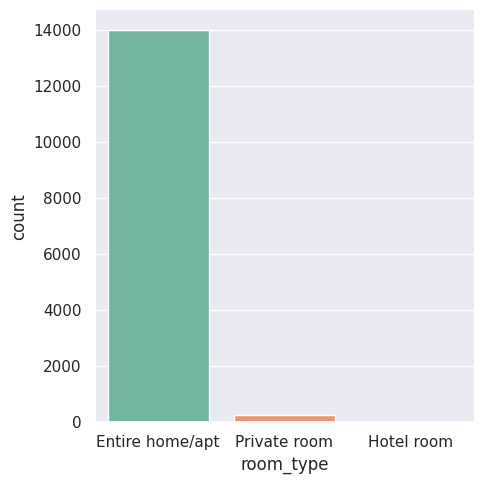

In [43]:
# Number of room types
print("Number of room types :", len(listingDF["room_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["room_type"].value_counts())
sb.catplot(x = "room_type", data = listingDF, kind = "count", palette="Set2")


POXI EXO!

As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.

### Analyzing the listings based on the property type.

Number of property types : 41

property_type
Entire rental unit                    8721
Entire condo                          4039
Entire loft                            636
Entire home                            228
Entire serviced apartment              192
Entire vacation home                   116
Private room in loft                    63
Private room in rental unit             54
Room in boutique hotel                  29
Private room in condo                   21
Room in hotel                           19
Private room in bed and breakfast       17
Entire guest suite                      17
Private room in serviced apartment      17
Entire villa                            16
Entire townhouse                        15
Tiny home                               12
Entire place                            11
Room in bed and breakfast               11
Room in aparthotel                      10
Private room in hostel                   8
Room in hostel                           4
Private r

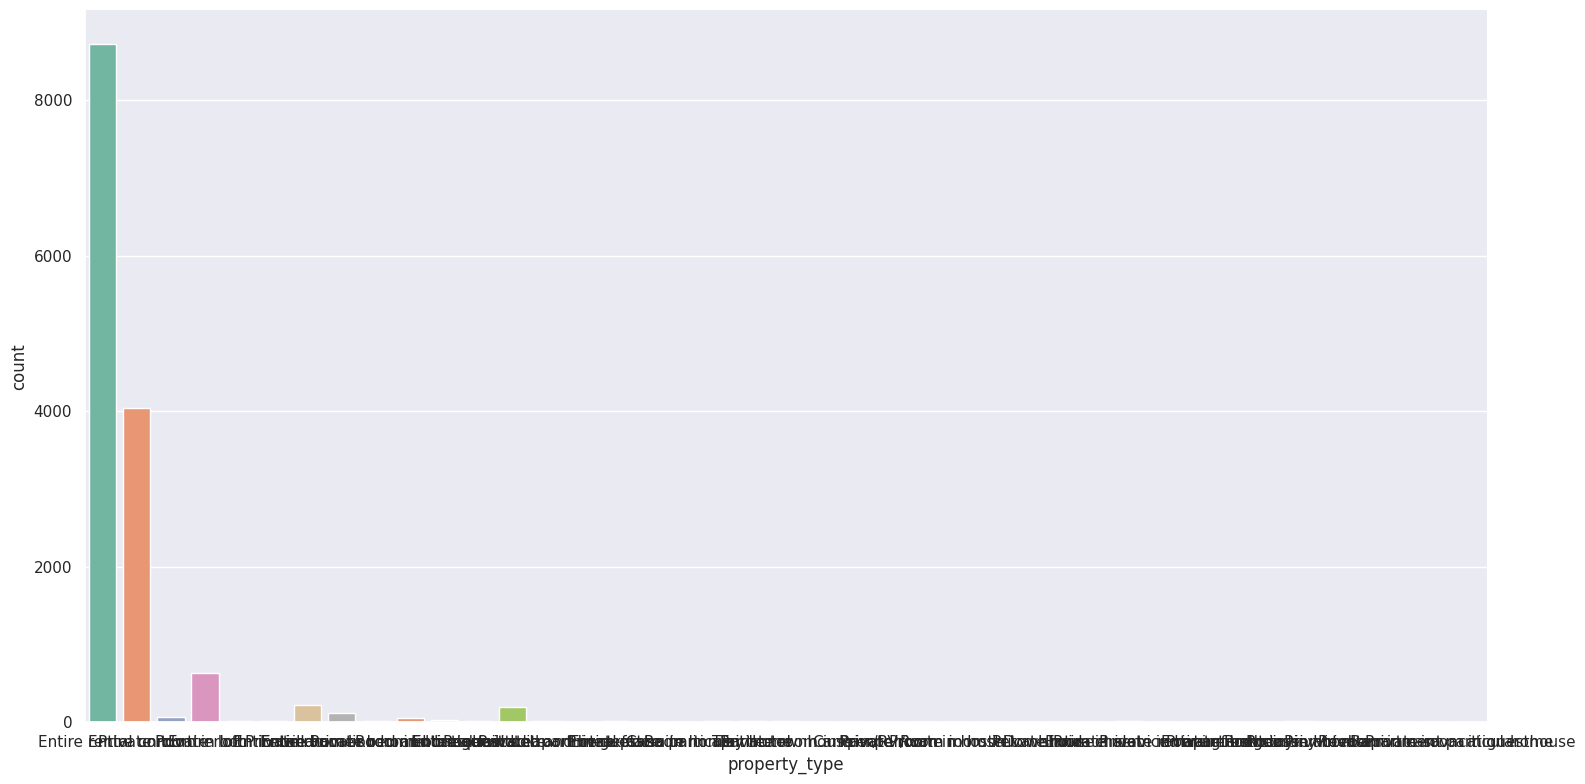

In [44]:
# Number of property types
print("Number of property types :", len(listingDF["property_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["property_type"].value_counts())
sb.catplot(x = "property_type", data = listingDF, kind = "count", palette="Set2", height = 8, aspect = 2)

From the above graph, we can see that there are a lot more listings of apartment and full houses than any other property type in seattle. Together with the earlier discovery that hosts prefer to list their full property than just a room or shared room, it can be inferred that most listings in Seattle are entire apartments or entire houses. Now lets analyze if these listing types have anything to do with the prices of the listings.

### Analyzing the prices for the different room and property types.

In [45]:
# Checking out the mean prices for the different room and property types
roomProperty_DF = listingDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
15,Entire villa,Entire home/apt,384.250000
16,Island,Entire home/apt,286.000000
38,Room in boutique hotel,Private room,266.379310
34,Room in aparthotel,Entire home/apt,260.333333
35,Room in aparthotel,Hotel room,254.800000


<Axes: xlabel='room_type', ylabel='property_type'>

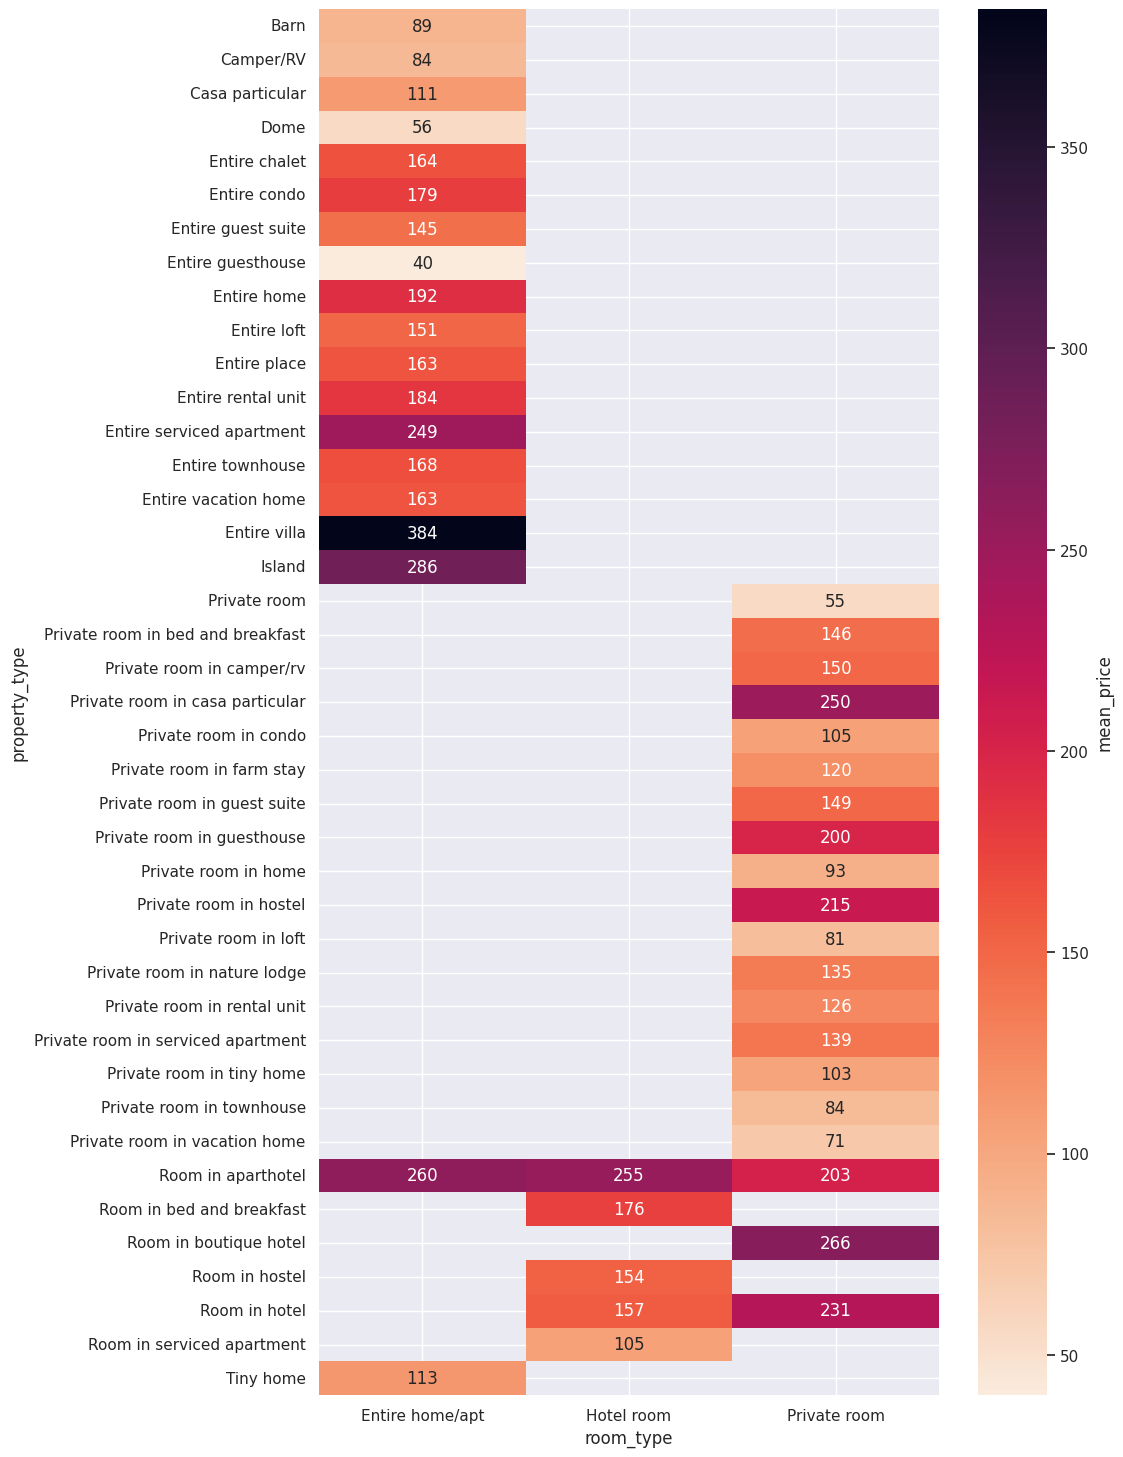

In [46]:
# Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,18))
sb.heatmap(listingDF.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})


From the above heatmap, with lighter colour representing lower price and darker representing higher price, we can see that shared rooms have the lighest colour hence cheapest. Private rooms have a slightly darker colour so they are in the middle, and entire houses are the darkest thus the most expensive. 

It is also important to note that the highest number of listings which was house and apartments actually have very similar prices for each of the room_type category.

All of this tells us that the room_type and property_type both play a very important role in the final price of the listing.

### Anaylzing the listings based on the number of bedrooms.

<Axes: xlabel='bedrooms', ylabel='price'>

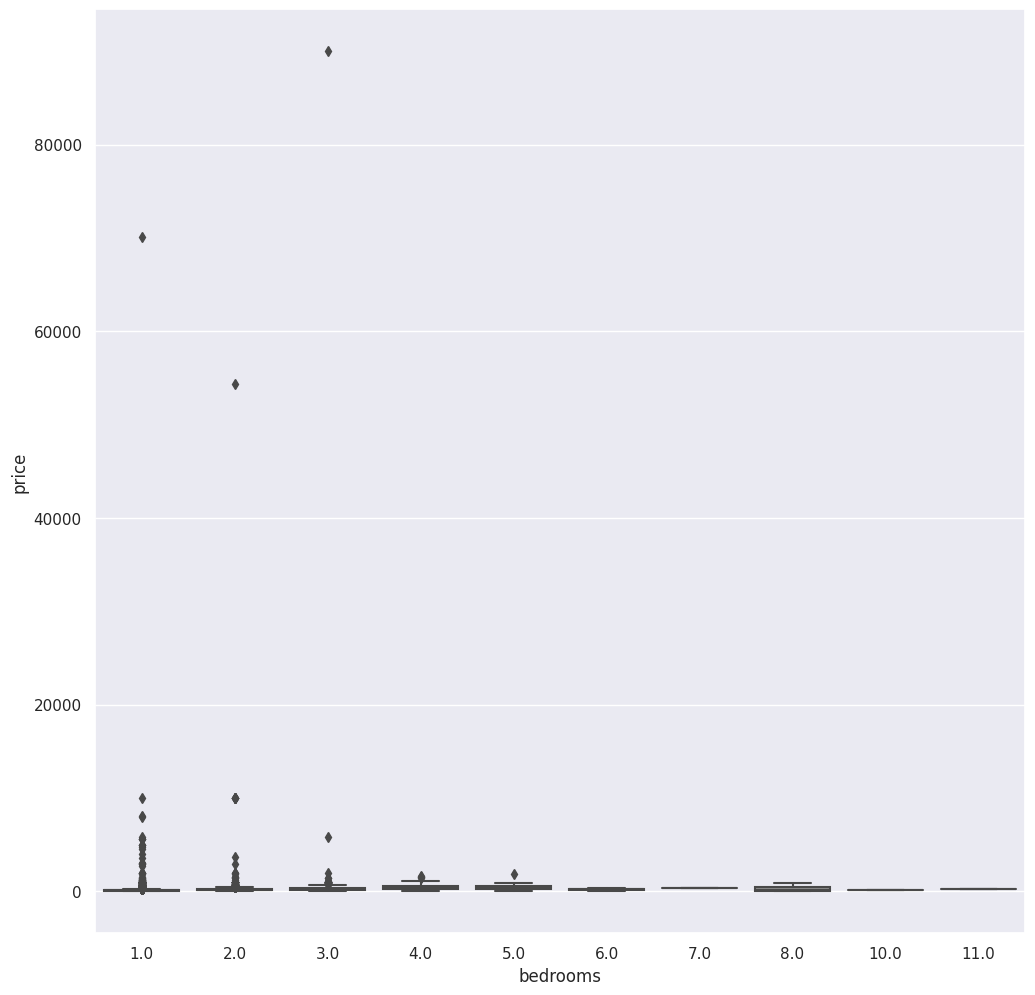

In [47]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sb.boxplot(x='bedrooms', y='price', data=listingDF[['bedrooms', 'price']])

The boxplots above show that indeed there is a trend between bedrooms and price. So, we should anaylse the no. bedrooms further with the property type.

In [48]:
# Creating a number of rooms vs property type dataframe
noRoomDF = listingDF[['property_type', 'bedrooms']]
noRoomDF.head(n=15)

,property_type,bedrooms
1,Entire rental unit,1.0
2,Entire condo,1.0
3,Entire rental unit,2.0
4,Entire rental unit,2.0
5,Entire rental unit,2.0
6,Entire rental unit,1.0
7,Entire rental unit,1.0
8,Entire rental unit,1.0
9,Entire rental unit,1.0
10,Entire rental unit,1.0


<Axes: xlabel='bedrooms', ylabel='property_type'>

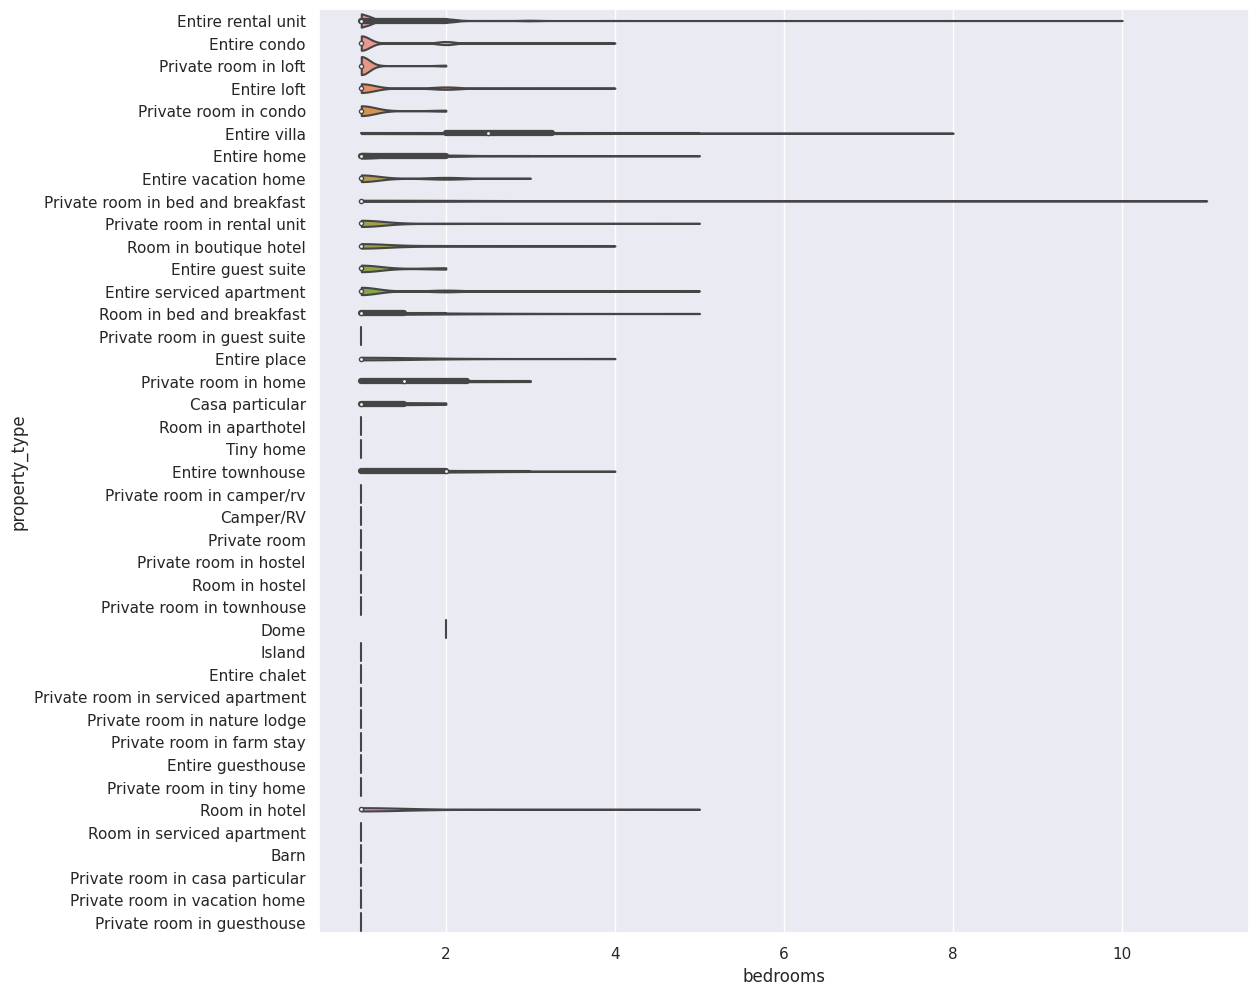

In [53]:
# Plotting a swarmplot to visually see the number of listings for each room_type and the no. bedrooms
plt.figure(figsize=(12,12))
sb.violinplot(x='bedrooms', y='property_type', data=noRoomDF, cut=0)

From the above swarmplot, we can see that generally, the number of listings decreases with higher no. of bedrooms. Additionally, only apartments and houses have more than 3 bedrooms with the exception of the boat house. We will now see the prices of these 2 variables plotted in a single heatmap.

<Axes: xlabel='bedrooms', ylabel='property_type'>

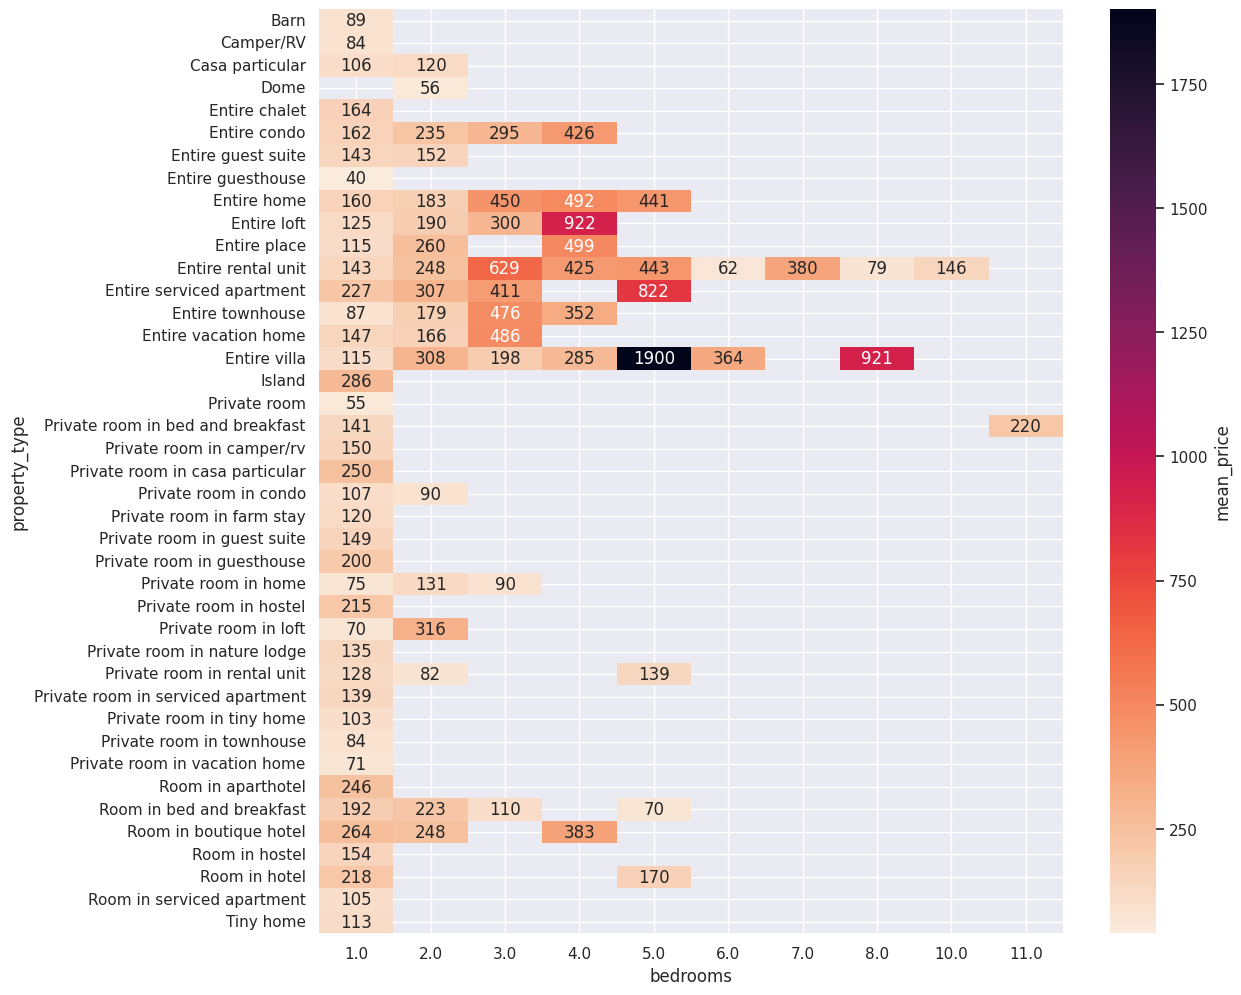

In [54]:
# Plotting a heatmap of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sb.heatmap(listingDF.groupby(['property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})


From the above heatmap and boxplots, we can see that unsurprisingly, price of listings increases with number of bedrooms. Only the listing of full house with 7 bedrooms does not follow this trend. To find out why, the number of listings with each number of bedrooms was printed.

In [55]:
# Number of bedrooms
print("Number of bedrooms :", len(listingDF["bedrooms"].unique()))
print()
print("BedRms|Listings")
# Number of listings of each room type
print(listingDF["bedrooms"].value_counts())

Number of bedrooms : 10

BedRms|Listings
bedrooms
1.0     10918
2.0      2786
3.0       471
4.0        82
5.0        17
8.0         3
6.0         2
10.0        2
11.0        1
7.0         1
Name: count, dtype: int64


From the table above, we can see that there was only 1 listing with 7 bedrooms. So, it can be seen as an exception (anomaly). So, the general trend is true, price of listing increases with no. bedrooms. 

So far, we can see that room type, property type and number of bedrooms have some effect on the price of a listing. We will now analyse if any specific ammenity in the property results in higher prices.

### Analyzing if any particular ammenity results in higher prices.

##### We are going to analyze the textual data of ammenities by finding the words that appear most frequently in ammenities in the most expensive listings.

In [60]:
import nltk
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = listingDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)


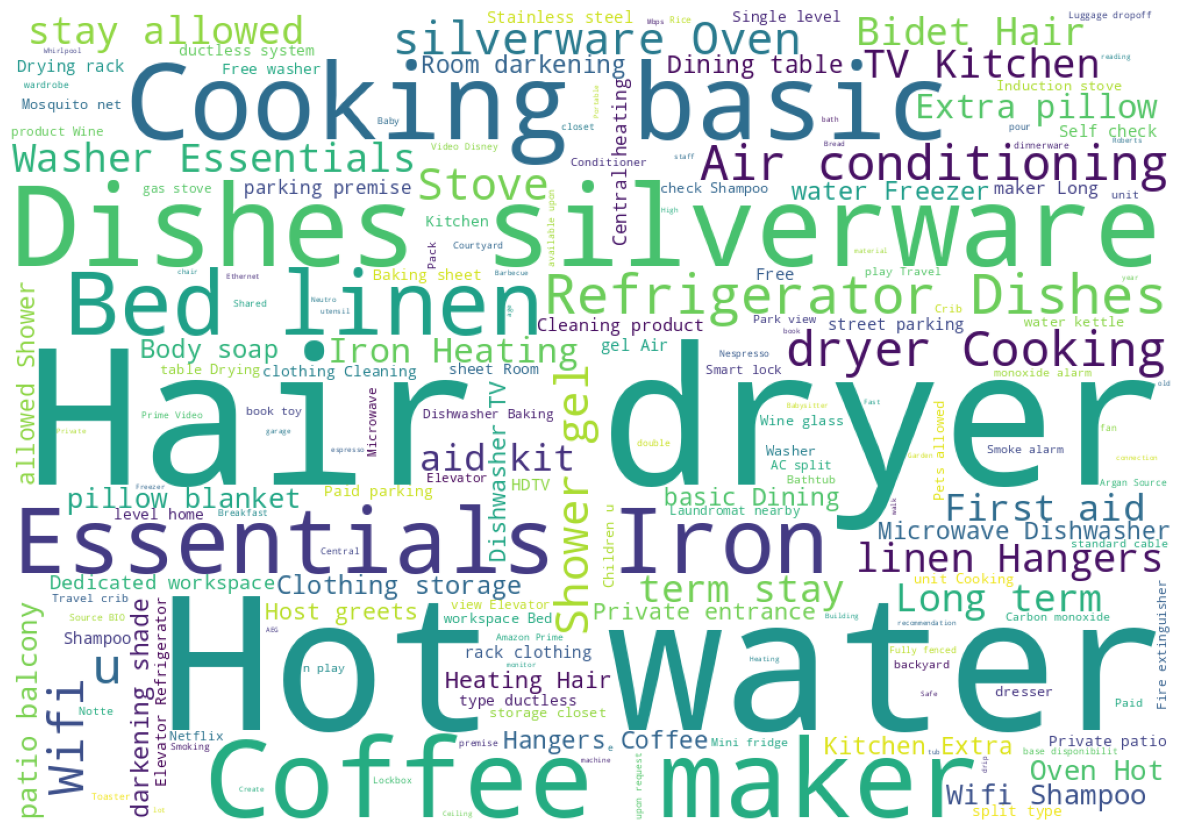

In [64]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the above wordcloud, we can see that the listings with the highest prices have ammenities such as 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly'. These ammenities will be further explored in depth in the machine learning parts of the project.

From all the analysis above, we can say a few things:

1. Type of room for the listing has a great influence in the price. Most hosts list their entire property. Moreover, entire property lisitings cost the most.


2. The type of property also influences price. Although the highest price is fetched by boat houses, there are very few of them. The most common properties are houses and apartments since these are the 2 types of properties that most hosts list and they do fetch a high price provided the entire property is listed as mentioned in (1).


3. The number of bedrooms in the listing also has a general trend with the price of the listing. The more rooms available, the higher the price of the listing.

 
4. Finally, there are certain ammenities such as: 'Dryer', 'Washer', 'Kid Friendly', 'Heating', 'Free Parking' etc. that most expensive listings also provide. **The ammenities will be further explored in the machine learning parts of the project.**